In [3]:
import numpy as np
import matplotlib.pyplot as plt

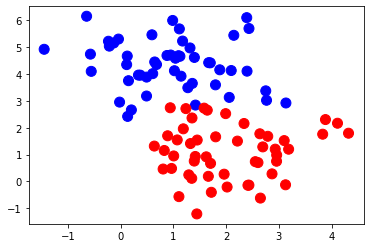

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Create the logistic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'tol': [0.00001, 0.0001, 0.001]
}
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'tol': [1e-05, 0.0001, 0.001]}

In [31]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(model, param_grid, verbose=3)

In [32]:
# Fit the model by using the grid search classifier. 
# This will take the LogisticRegression model and try each combination of parameters.
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=0.001, tol=1e-05 ..............................................
[CV] .................. C=0.001, tol=1e-05, score=0.733, total=   0.0s
[CV] C=0.001, tol=1e-05 ..............................................
[CV] .................. C=0.001, tol=1e-05, score=0.600, total=   0.0s
[CV] C=0.001, tol=1e-05 ..............................................
[CV] .................. C=0.001, tol=1e-05, score=0.600, total=   0.0s
[CV] C=0.001, tol=1e-05 ..............................................
[CV] .................. C=0.001, tol=1e-05, score=0.600, total=   0.0s
[CV] C=0.001, tol=1e-05 ..............................................
[CV] .................. C=0.001, tol=1e-05, score=0.533, total=   0.0s
[CV] C=0.001, tol=0.0001 .............................................
[CV] ................. C=0.001, tol=0.0001, score=0.733, total=   0.0s
[CV] C=0.001, tol=0.0001 .............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, tol=0.001 ................................................
[CV] .................... C=0.1, tol=0.001, score=1.000, total=   0.0s
[CV] C=0.1, tol=0.001 ................................................
[CV] .................... C=0.1, tol=0.001, score=1.000, total=   0.0s
[CV] C=1, tol=1e-05 ..................................................
[CV] ...................... C=1, tol=1e-05, score=1.000, total=   0.0s
[CV] C=1, tol=1e-05 ..................................................
[CV] ...................... C=1, tol=1e-05, score=0.867, total=   0.0s
[CV] C=1, tol=1e-05 ..................................................
[CV] ...................... C=1, tol=1e-05, score=0.867, total=   0.0s
[CV] C=1, tol=1e-05 ..................................................
[CV] ...................... C=1, tol=1e-05, score=1.000, total=   0.0s
[CV] C=1, tol=1e-05 ..................................................
[CV] ...................... C=1, tol=1e-05, score=1.000, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [33]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

{'C': 0.01, 'tol': 1e-05}


In [34]:
# List the best score
print(grid_clf.best_score_)

0.9466666666666667


In [35]:
# Make predictions with the hypertuned model
predictions = grid_clf.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0])

In [36]:
# Score the hypertuned model on the test dataset
grid_clf.score(X_test, y_test)

0.88

# RandomizedSearchCV

In [37]:
big_param_grid = {
    'C' : np.arange(0, 10, 0.01),
    'tol': np.arange(0, 0.001, 1e-5),
}
big_param_grid

{'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
        1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
        1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
        1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
        1.43, 1.44, 1.45, 1.46, 1

In [40]:
# Create the RandomizedSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import RandomizedSearchCV
random_clf = RandomizedSearchCV(model, big_param_grid, n_iter=100, random_state=1, verbose=3)
random_clf

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={...
       6.3e-04, 6.4e-04, 6.5e-04, 6.6e-04, 6.7e-04, 6.8e-04, 6.9e-04,
       7.0e-04, 7.1e-04, 7.2e-04, 7.3e-04, 7.4e-04, 7.5e-04, 7.6e-04,
       7.7e-04, 7.8e-04, 7.9e-04, 8.0e-04, 8.1e-04, 8.2e-04, 8.3e-04,
       8.4e-04, 8.5e-04

In [41]:
# Fit the model by using the randomized search estimator. 
# This will take the LogisticRegression model and try a random sample of combinations of parameters
random_clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] tol=0.00039000000000000005, C=9.85 ..............................
[CV] .. tol=0.00039000000000000005, C=9.85, score=1.000, total=   0.0s
[CV] tol=0.00039000000000000005, C=9.85 ..............................
[CV] .. tol=0.00039000000000000005, C=9.85, score=0.867, total=   0.0s
[CV] tol=0.00039000000000000005, C=9.85 ..............................
[CV] .. tol=0.00039000000000000005, C=9.85, score=0.800, total=   0.0s
[CV] tol=0.00039000000000000005, C=9.85 ..............................
[CV] .. tol=0.00039000000000000005, C=9.85, score=1.000, total=   0.0s
[CV] tol=0.00039000000000000005, C=9.85 ..............................
[CV] .. tol=0.00039000000000000005, C=9.85, score=1.000, total=   0.0s
[CV] tol=8e-05, C=7.7700000000000005 .................................
[CV] ..... tol=8e-05, C=7.7700000000000005, score=1.000, total=   0.0s
[CV] tol=8e-05, C=7.7700000000000005 .................................
[CV] ..... tol

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] tol=0.00048000000000000007, C=9.84 ..............................
[CV] .. tol=0.00048000000000000007, C=9.84, score=0.800, total=   0.0s
[CV] tol=0.00048000000000000007, C=9.84 ..............................
[CV] .. tol=0.00048000000000000007, C=9.84, score=1.000, total=   0.0s
[CV] tol=0.00048000000000000007, C=9.84 ..............................
[CV] .. tol=0.00048000000000000007, C=9.84, score=1.000, total=   0.0s
[CV] tol=9e-05, C=2.06 ...............................................
[CV] ................... tol=9e-05, C=2.06, score=1.000, total=   0.0s
[CV] tol=9e-05, C=2.06 ...............................................
[CV] ................... tol=9e-05, C=2.06, score=0.867, total=   0.0s
[CV] tol=9e-05, C=2.06 ...............................................
[CV] ................... tol=9e-05, C=2.06, score=0.800, total=   0.0s
[CV] tol=9e-05, C=2.06 ...............................................
[CV] ................... tol=9e-05, C=2.06, score=1.000, total=   0.0s
[CV] 

[CV] .. tol=0.00045000000000000004, C=5.72, score=1.000, total=   0.0s
[CV] tol=0.00045000000000000004, C=5.72 ..............................
[CV] .. tol=0.00045000000000000004, C=5.72, score=1.000, total=   0.0s
[CV] tol=0.00062, C=8.84 .............................................
[CV] ................. tol=0.00062, C=8.84, score=1.000, total=   0.0s
[CV] tol=0.00062, C=8.84 .............................................
[CV] ................. tol=0.00062, C=8.84, score=0.867, total=   0.0s
[CV] tol=0.00062, C=8.84 .............................................
[CV] ................. tol=0.00062, C=8.84, score=0.800, total=   0.0s
[CV] tol=0.00062, C=8.84 .............................................
[CV] ................. tol=0.00062, C=8.84, score=1.000, total=   0.0s
[CV] tol=0.00062, C=8.84 .............................................
[CV] ................. tol=0.00062, C=8.84, score=1.000, total=   0.0s
[CV] tol=0.0004, C=9.27 ..............................................
[CV] .

[CV] .................. tol=0.00072, C=5.8, score=0.867, total=   0.0s
[CV] tol=0.00072, C=5.8 ..............................................
[CV] .................. tol=0.00072, C=5.8, score=0.800, total=   0.0s
[CV] tol=0.00072, C=5.8 ..............................................
[CV] .................. tol=0.00072, C=5.8, score=1.000, total=   0.0s
[CV] tol=0.00072, C=5.8 ..............................................
[CV] .................. tol=0.00072, C=5.8, score=1.000, total=   0.0s
[CV] tol=0.00033000000000000005, C=9.790000000000001 .................
[CV]  tol=0.00033000000000000005, C=9.790000000000001, score=1.000, total=   0.0s
[CV] tol=0.00033000000000000005, C=9.790000000000001 .................
[CV]  tol=0.00033000000000000005, C=9.790000000000001, score=0.867, total=   0.0s
[CV] tol=0.00033000000000000005, C=9.790000000000001 .................
[CV]  tol=0.00033000000000000005, C=9.790000000000001, score=0.800, total=   0.0s
[CV] tol=0.00033000000000000005, C=9.7900000

[CV] .................. tol=0.00018, C=8.5, score=1.000, total=   0.0s
[CV] tol=0.00018, C=8.5 ..............................................
[CV] .................. tol=0.00018, C=8.5, score=1.000, total=   0.0s
[CV] tol=0.00044, C=0.18 .............................................
[CV] ................. tol=0.00044, C=0.18, score=1.000, total=   0.0s
[CV] tol=0.00044, C=0.18 .............................................
[CV] ................. tol=0.00044, C=0.18, score=0.867, total=   0.0s
[CV] tol=0.00044, C=0.18 .............................................
[CV] ................. tol=0.00044, C=0.18, score=0.867, total=   0.0s
[CV] tol=0.00044, C=0.18 .............................................
[CV] ................. tol=0.00044, C=0.18, score=1.000, total=   0.0s
[CV] tol=0.00044, C=0.18 .............................................
[CV] ................. tol=0.00044, C=0.18, score=1.000, total=   0.0s
[CV] tol=0.0005200000000000001, C=0.9500000000000001 .................
[CV]  

Z:\Travis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:935: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
Z:\Travis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:124: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + .5 * alpha * np.dot(w, w)
Z:\Travis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:129: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
Z:\Travis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
Z:\Travis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:935: RuntimeWarning: divi


[CV] tol=0.00048000000000000007, C=9.32 ..............................
[CV] .. tol=0.00048000000000000007, C=9.32, score=0.867, total=   0.0s
[CV] tol=0.00048000000000000007, C=9.32 ..............................
[CV] .. tol=0.00048000000000000007, C=9.32, score=0.800, total=   0.0s
[CV] tol=0.00048000000000000007, C=9.32 ..............................
[CV] .. tol=0.00048000000000000007, C=9.32, score=1.000, total=   0.0s
[CV] tol=0.00048000000000000007, C=9.32 ..............................
[CV] .. tol=0.00048000000000000007, C=9.32, score=1.000, total=   0.0s
[CV] tol=0.00013000000000000002, C=1.23 ..............................
[CV] .. tol=0.00013000000000000002, C=1.23, score=1.000, total=   0.0s
[CV] tol=0.00013000000000000002, C=1.23 ..............................
[CV] .. tol=0.00013000000000000002, C=1.23, score=0.867, total=   0.0s
[CV] tol=0.00013000000000000002, C=1.23 ..............................
[CV] .. tol=0.00013000000000000002, C=1.23, score=0.867, total=   0.0s
[CV] 

[CV] ................. tol=0.00068, C=8.25, score=0.867, total=   0.0s
[CV] tol=0.00068, C=8.25 .............................................
[CV] ................. tol=0.00068, C=8.25, score=0.800, total=   0.0s
[CV] tol=0.00068, C=8.25 .............................................
[CV] ................. tol=0.00068, C=8.25, score=1.000, total=   0.0s
[CV] tol=0.00068, C=8.25 .............................................
[CV] ................. tol=0.00068, C=8.25, score=1.000, total=   0.0s
[CV] tol=0.0004, C=7.5 ...............................................
[CV] ................... tol=0.0004, C=7.5, score=1.000, total=   0.0s
[CV] tol=0.0004, C=7.5 ...............................................
[CV] ................... tol=0.0004, C=7.5, score=0.867, total=   0.0s
[CV] tol=0.0004, C=7.5 ...............................................
[CV] ................... tol=0.0004, C=7.5, score=0.800, total=   0.0s
[CV] tol=0.0004, C=7.5 ...............................................
[CV] .

[CV] ... tol=0.0008100000000000001, C=1.36, score=1.000, total=   0.0s
[CV] tol=0.0008100000000000001, C=1.36 ...............................
[CV] ... tol=0.0008100000000000001, C=1.36, score=1.000, total=   0.0s
[CV] tol=0.00097, C=7.55 .............................................
[CV] ................. tol=0.00097, C=7.55, score=1.000, total=   0.0s
[CV] tol=0.00097, C=7.55 .............................................
[CV] ................. tol=0.00097, C=7.55, score=0.867, total=   0.0s
[CV] tol=0.00097, C=7.55 .............................................
[CV] ................. tol=0.00097, C=7.55, score=0.800, total=   0.0s
[CV] tol=0.00097, C=7.55 .............................................
[CV] ................. tol=0.00097, C=7.55, score=1.000, total=   0.0s
[CV] tol=0.00097, C=7.55 .............................................
[CV] ................. tol=0.00097, C=7.55, score=1.000, total=   0.0s
[CV] tol=0.0009600000000000001, C=5.2 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.3s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={...
       6.3e-04, 6.4e-04, 6.5e-04, 6.6e-04, 6.7e-04, 6.8e-04, 6.9e-04,
       7.0e-04, 7.1e-04, 7.2e-04, 7.3e-04, 7.4e-04, 7.5e-04, 7.6e-04,
       7.7e-04, 7.8e-04, 7.9e-04, 8.0e-04, 8.1e-04, 8.2e-04, 8.3e-04,
       8.4e-04, 8.5e-04

In [42]:
# List the best parameters for this dataset
print(random_clf.best_params_)

{'tol': 0.00092, 'C': 0.51}


In [43]:
# List the best score
print(random_clf.best_score_)

0.9466666666666667


In [44]:
# Make predictions with the hypertuned model
predictions = random_clf.predict(X_test)

In [45]:
# Calculate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.83      1.00      0.91        10
         red       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

